In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

pd.options.display.max_rows = 100

import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')
mpl.rcParams['font.family'] ='AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False


In [109]:
fastcampus = pd.read_csv('/Users/launchmoney/Desktop/Python_Workbench/9. PJT/project/실습데이터.csv')
fastcampus.info(memory_usage='deep')
fastcampus.head(3)
test = pd.read_csv('/Users/launchmoney/Desktop/Python_Workbench/9. PJT/project/실습데이터.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 155.1 MB


In [8]:
# 사용할 컬럼 택
usecols = ['카테고리', '거래일자','판매가격','실거래금액']
df = fastcampus[usecols]
df

,카테고리,거래일자,판매가격,실거래금액
0,업무 생산성,2022. 12. 31. 오후 10:12:33,189000,159000
1,부동산/금융,2022. 12. 30. 오후 6:12:57,501000,501000
2,영상/3D,2022. 12. 31. 오후 11:12:15,549000,549000
3,프로그래밍,2022. 12. 31. 오후 11:12:03,165000,135000
4,프로그래밍,2022. 12. 31. 오후 11:12:10,239000,239000
...,...,...,...,...
159323,부업/창업,2022. 1. 1. 오전 12:01:08,217000,207000
159324,영상/3D,2022. 1. 1. 오전 12:01:12,385000,385000
159325,데이터 사이언스,2022. 1. 1. 오전 12:01:21,166000,136000
159326,업무 생산성,2022. 1. 2. 오전 11:01:24,289000,289000


In [63]:
# 1.카테고리별 수강생 거래내역에서 row한줄 = 수강생 1명
value_counts = df['카테고리'].value_counts()
value_counts

프로그래밍       51705
데이터 사이언스    26859
일러스트        15443
영상/3D       13923
업무 생산성      13916
마케팅         12896
부동산/금융      10797
디자인         10211
투자/재테크       2483
부업/창업        1094
크리에이티브          1
Name: 카테고리, dtype: int64

In [81]:
value_counts.sum() # 전체 row 수 

159328

In [62]:
# 숫자가 난잡하다 백분율로 볼까

                # 카테고리별 수강생 / 전체 거래내역 
percentages = (value_counts / value_counts.sum()) * 100
percentages

프로그래밍       32.451923
데이터 사이언스    16.857677
일러스트         9.692584
영상/3D        8.738577
업무 생산성       8.734184
마케팅          8.093995
부동산/금융       6.776587
디자인          6.408792
투자/재테크       1.558420
부업/창업        0.686634
크리에이티브       0.000628
Name: 카테고리, dtype: float64

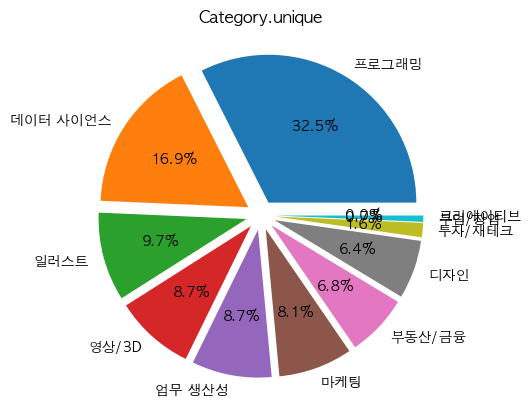

In [80]:
# 백분율을 맛있는 파이로 보자~
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', explode=[0.1] * 11)
plt.title('Category.unique')
plt.show()

# 잘 안보이실까보아
# 엄,, 꼴찌 3세트는 1. 크리에이티브 0.000628 (거래내역 하나..) csv찾아봐도 하나밖에 없ㄷ
#                2. 부업/창업 0.68 (1098개?)
#                3. 투자/재테크 1.55 (2483개) 

# 

In [121]:
# 2. 카테고리별 실거래 매출 = - 쿠폰할인적용금액, 환불은 0원 처리
# 파이에서 나온 순위별로 매출도 똑같을까 라는 의문에서 시작된 ㅇㅇ

count_money = pd.Series(df.groupby('카테고리')['실거래금액'].sum()) #카테고리별 매출
count_money



카테고리
데이터 사이언스    4372903916
디자인         1367770714
마케팅         1686933912
부동산/금융      2194701472
부업/창업        102751487
업무 생산성      1542856913
영상/3D       2032814565
일러스트        2140823180
크리에이티브               0
투자/재테크       447801574
프로그래밍       6708714350
Name: 실거래금액, dtype: int64

In [126]:
count_moneis = pd.Series(df['실거래금액'].sum())
count_moneis

0    22598072083
dtype: int64

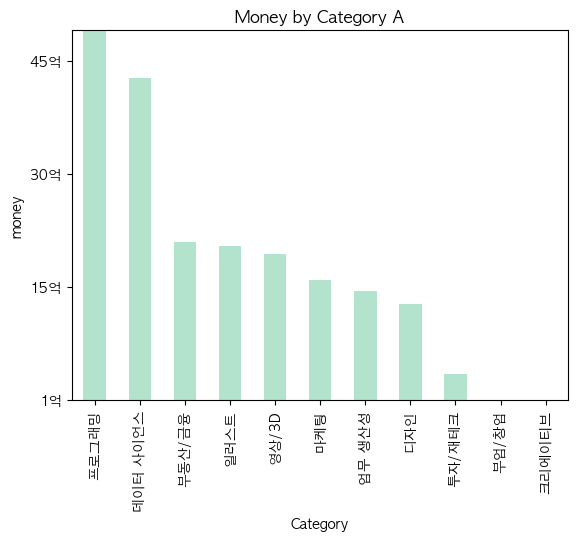

In [164]:
fd = pd.DataFrame({'A': ['프로그래밍', '데이터 사이언스', '일러스트', '영상/3D', '업무 생산성', '마케팅', '부동산/금융', '디자인' ,'투자/재테크', '부업/창업', '크리에이티브'],
                   'B': [6708714350, 4372903916, 2140823180, 2032814565, 1542856913, 1686933912, 2194701472, 1367770714, 447801574, 102751487, 0]})

# group by column 'A' and sum column 'B'
price = pd.Series(fd.groupby('A')['B'].sum())

price = price.sort_values(ascending=False)


ax = price.plot(kind='bar', cmap='Pastel2')
ax.set_xlabel('Category')
ax.set_ylabel('money')
ax.set_title('Money by Category A')

ax.set_ylim(100000000, 5000000000)
ax.set_yticks(np.arange(100000000, 5100000000, 1500000000), labels=['1억', '15억', '30억', '45억'])

plt.show()

'''
분야별 수강생 수(거래 수)      # 분야별 매출 수익
1. 프로그래밍               1. 프로그래밍         43억
2. 데싸                   2. 데싸
3. 일러                   3. 부동산/금융 <-------- 오
4. 영상                   4. 일러
5. 업무 생산               5. 영상
6. 마케팅                 6. 마케팅
7. 부동산/금융             7. 업무생산
8. 디자인                 8. 디자인
9. 투자/재테크/크리에이티브   9. 투자 재테크
                        10 부업/창업  1억 정도 수익이 으음
'''


'''
 1. 부동산은 수강생 수가 적어도 매출이 3순위이다. 이유가 뭘까? (부동산이 평균 거래 금액이 높긴 하다)
 2. 프로그래밍과 데싸가 A군, 부동산/일러/영상/마케팅/업무/디자인 B군, 투자,부업/창업/크리에이티브 C군
 3. 크리에이티브는 왜 수익이 0이지 -> 크리에이티브라는 카테고리가 사라졌ㄷㅏ
 4. 부업/창업은 현재 강의가 4개밖에 없다.
 5. RED 가 가격이 꽤 높은데 거래수가 12000정도, 23억 정도 담당, RED라는 음,,프리미엄 수식어 같은 느낌인가
 6. 
'''


In [182]:
Finance = df[(df['카테고리'] == '부동산/금융')]
Finance['실거래금액'].mean()

203269.5630267667

In [181]:
Programming = df[(df['카테고리'] == '프로그래밍')]
Programming['실거래금액'].mean()

129749.81819940044

In [177]:
Programming = df[(df['카테고리'] == '데이터 사이언스')]
Programming['실거래금액'].mean()

162809.6323764846

In [186]:
RED = fastcampus[(fastcampus['포맷'] == 'RED')]
RED.sum()


거래id                                               24298928230
유형           PAYMENTPAYMENTPAYMENTPAYMENTPAYMENTPAYMENTPAYM...
고객id                                                 614435333
코스ID                                                2579506500
사이트          FASTCAMPUSFASTCAMPUSFASTCAMPUSFASTCAMPUSFASTCA...
포맷           REDREDREDREDREDREDREDREDREDREDREDREDREDREDREDR...
카테고리         프로그래밍영상/3D프로그래밍마케팅디자인업무 생산성마케팅마케팅마케팅부동산/금융프로그래...
코스(상품) 이름    The RED : 비즈니스 성공을 위한 Java/Spring 기반 서비스 개발과 M...
거래일자         2022. 12. 31. 오후 11:12:292022. 12. 31. 오후 11:1...
쿠폰이름         -[WELCOME] The RED 3만원할인-[WELCOME] The RED 3만원...
판매가격         2640002440003000001980004000002590001580003390...
결제수단         CARDCARDCARDTRANSCARDCARDPROMOTIONCARDCARDCARD...
실거래금액                                               2280963266
쿠폰할인액        -30000-300003000030000158000-30000-30000---300...
거래금액         2640002140003000001680003700002290000339000168...
환불금액         ------------------------------------------